<a href="https://colab.research.google.com/github/thomas-c-reid/TensorflowDeepLearning/blob/master/10_Introduction_to_time_series_forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
plt.style.use('dark_background')

Month          object
#Passengers     int64
dtype: object
Month          datetime64[ns]
#Passengers             int64
dtype: object


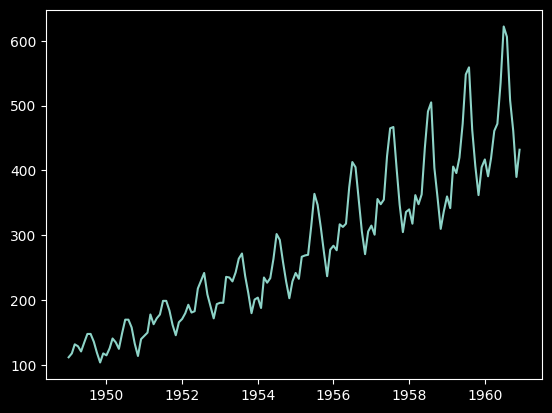

In [ ]:
df = pd.read_csv("AirPassengers.csv")
print(df.dtypes)

df['Month'] = pd.to_datetime(df['Month'])
print(df.dtypes)

df.set_index('Month', inplace=True)

df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)

plt.plot(df['Passengers'])

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df)
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")

pvalue =  0.991880243437641  if above 0.05, data is not stationary


In [ ]:
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()

<Axes: xlabel='year', ylabel='Passengers'>

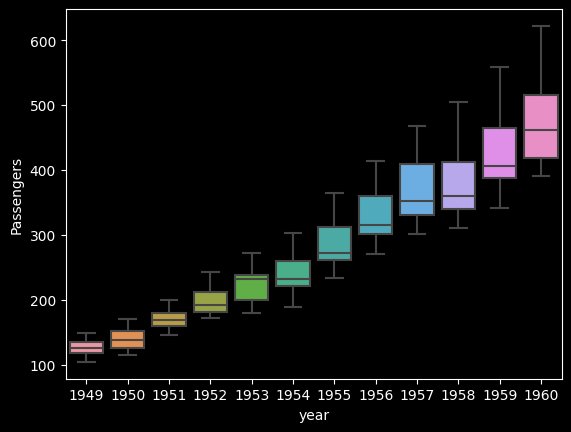

In [ ]:
sns.boxplot(x='year', y='Passengers', data=df)

<Axes: xlabel='month', ylabel='Passengers'>

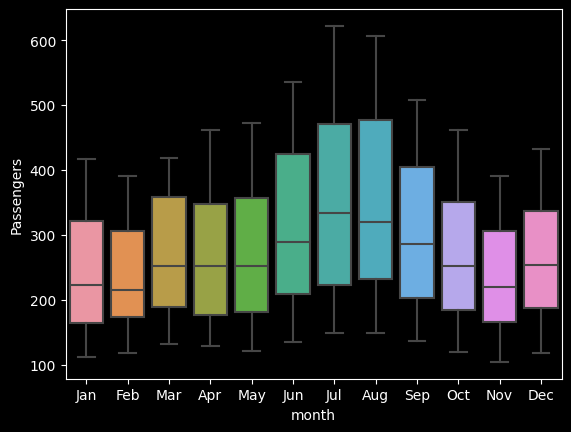

In [ ]:
sns.boxplot(x='month', y='Passengers', data=df)

In [ ]:
#Extract and plot trend, seasonal and residuals. 
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(df['Passengers'],  
                            model ='additive')

In [ ]:
trend = decomposed.trend
seasonal = decomposed.seasonal #Cyclic behavior may not be seasonal!
residual = decomposed.resid

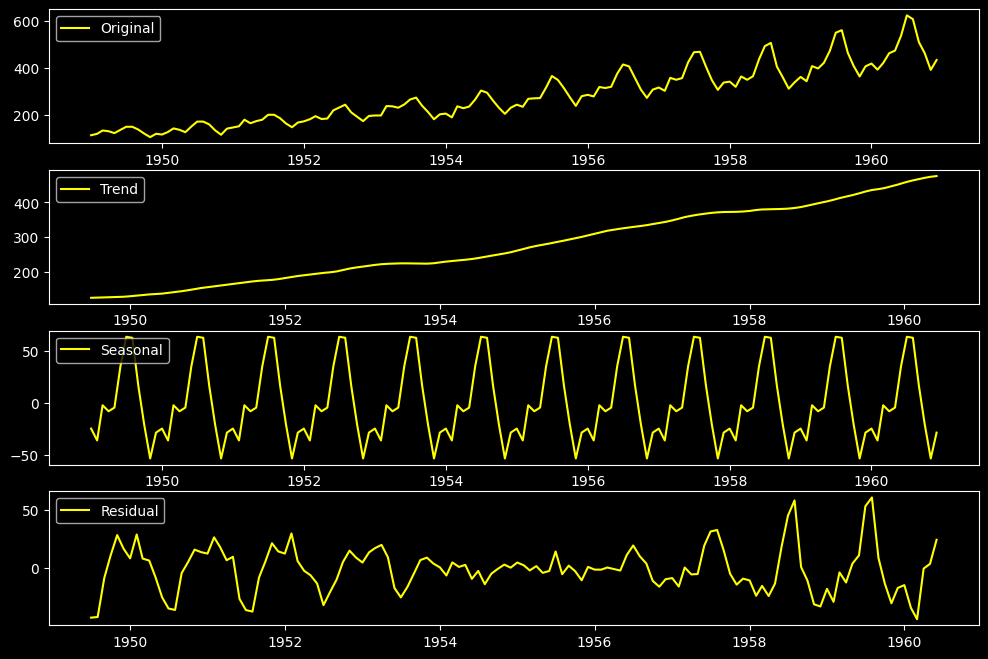

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['Passengers'], label='Original', color='yellow')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='yellow')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='yellow')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='yellow')
plt.legend(loc='upper left')
plt.show()


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

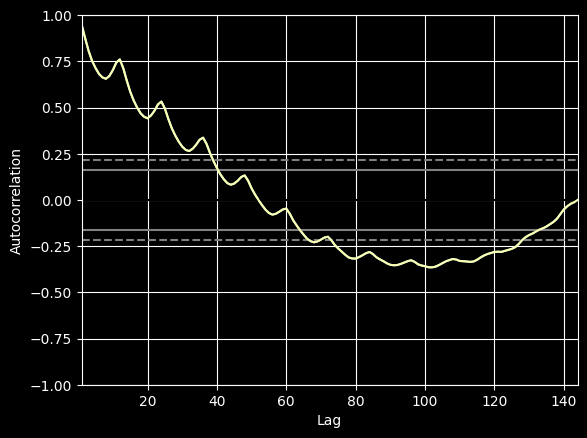

In [ ]:
#AUTOCORRELATION
#Autocorrelation is simply the correlation of a series with its own lags.
# Plot lag on x axis and correlation on y axis
#Any correlation above confidence lnes are statistically significant.

from statsmodels.tsa.stattools import acf

acf_144 = acf(df.Passengers, nlags=144)
plt.plot(acf_144)

#Obtain the same but with single line and more info...
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.Passengers) 
#Horizontal bands indicate 95% and 99% (dashed) confidence bands

#A strong positive correlation for lags below 40 (months)